In [20]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import scipy.cluster.hierarchy as shc  


In [15]:
data = pd.read_csv('Country-data.csv')
data.sample(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
85,Latvia,7.8,53.7,6.68,55.1,18300,-0.812,73.1,1.36,11300
136,Solomon Islands,28.1,49.3,8.55,81.2,1780,6.810,61.7,4.24,1290
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300
142,Sudan,76.7,19.7,6.32,17.2,3370,19.600,66.3,4.88,1480
137,South Africa,53.7,28.6,8.94,27.4,12000,6.350,54.3,2.59,7280


In [3]:
data.shape

(167, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


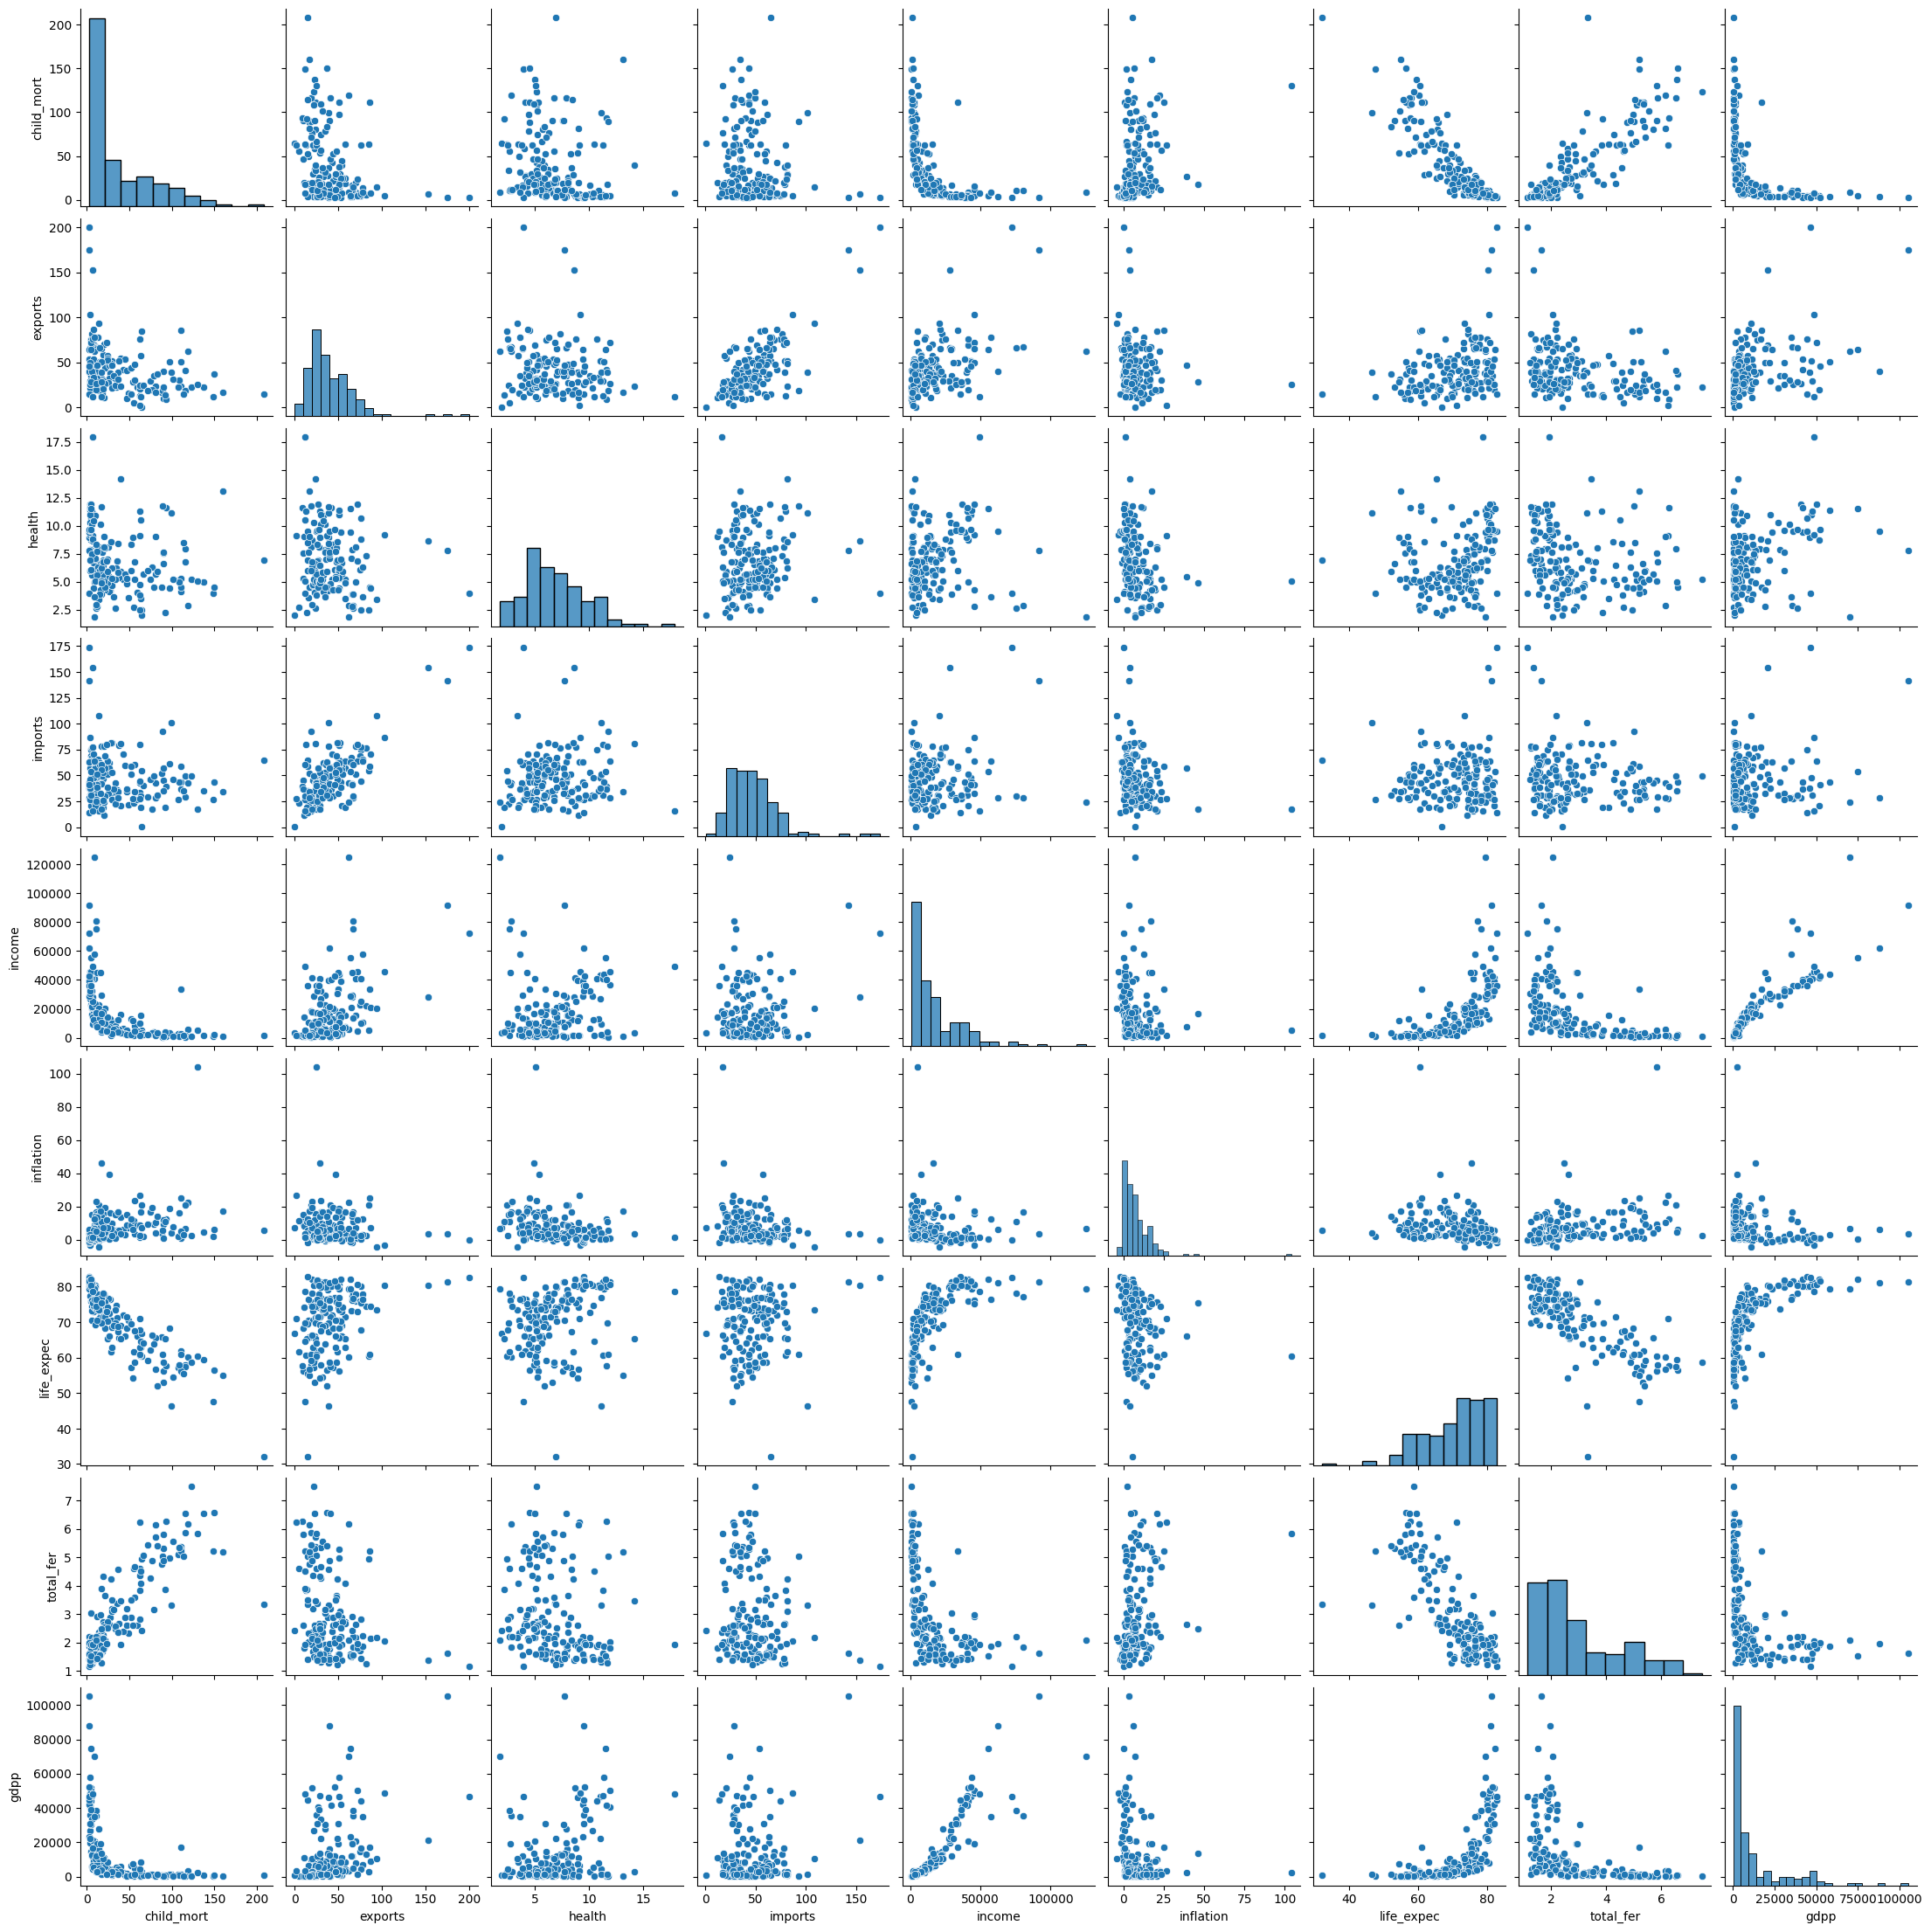

In [6]:
sns.pairplot(data = data)

In [16]:
data = data.drop('country',axis=1)

<Axes: >

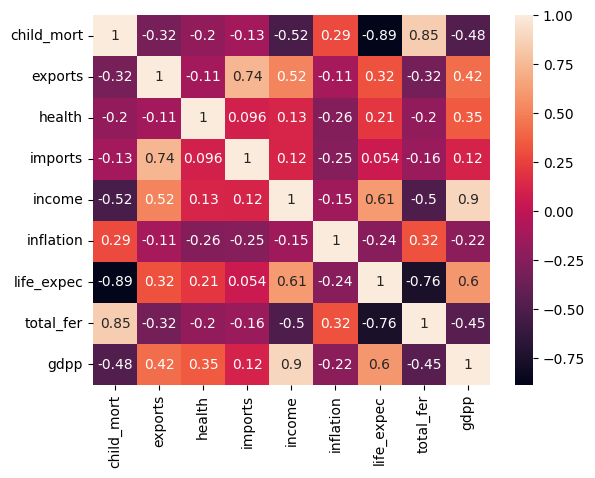

In [11]:
corr_matrix = data.corr()
sns.heatmap (corr_matrix,annot=True)

Text(0, 0.5, 'Total Fer')

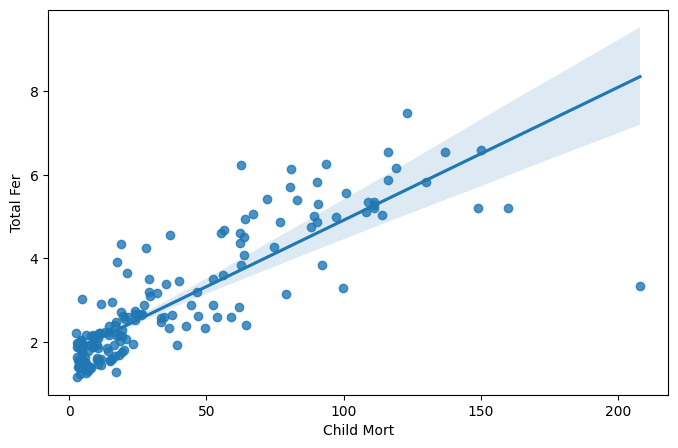

In [9]:
plt.figure(figsize=(8,5))
sns.regplot(x = 'child_mort', y = 'total_fer',data = data)
plt.xlabel('Child Mort')
plt.ylabel('Total Fer')


Text(0, 0.5, 'Import')

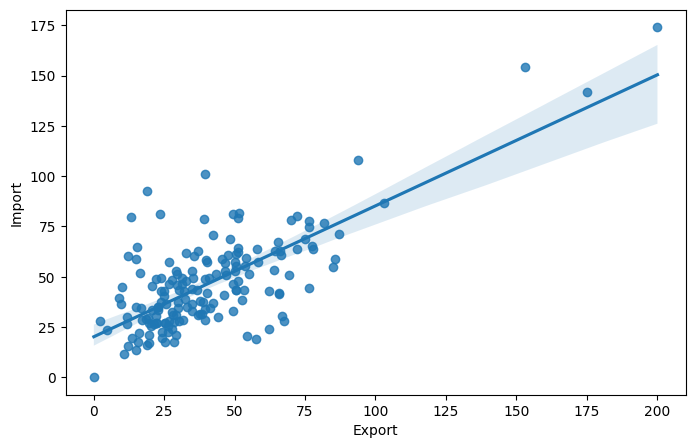

In [10]:
plt.figure(figsize=(8,5))
sns.regplot(x = 'exports', y = 'imports',data = data)
plt.xlabel('Export')
plt.ylabel('Import')


Text(0, 0.5, 'Import')

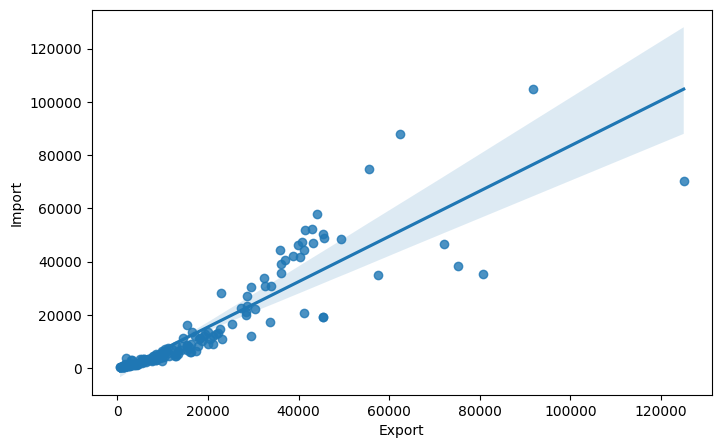

In [11]:
plt.figure(figsize=(8,5))
sns.regplot(x = 'income', y = 'gdpp',data = data)
plt.xlabel('Export')
plt.ylabel('Import')


In [18]:
x.shape

(167, 9)

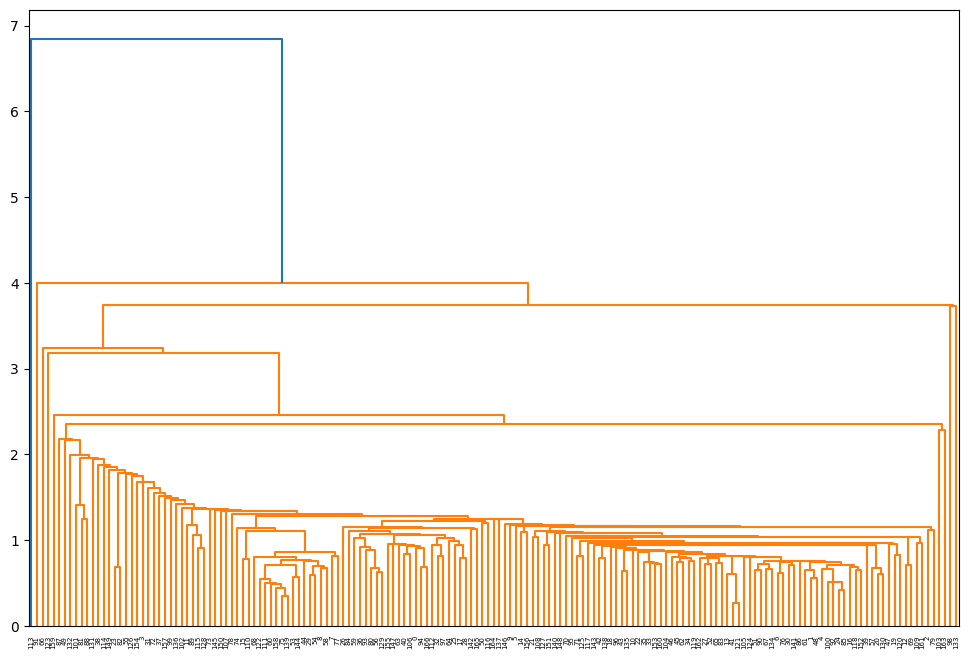

In [26]:
plt.figure(figsize=(12,8))
dendSingle = shc.dendrogram(shc.linkage(x,method='single'))

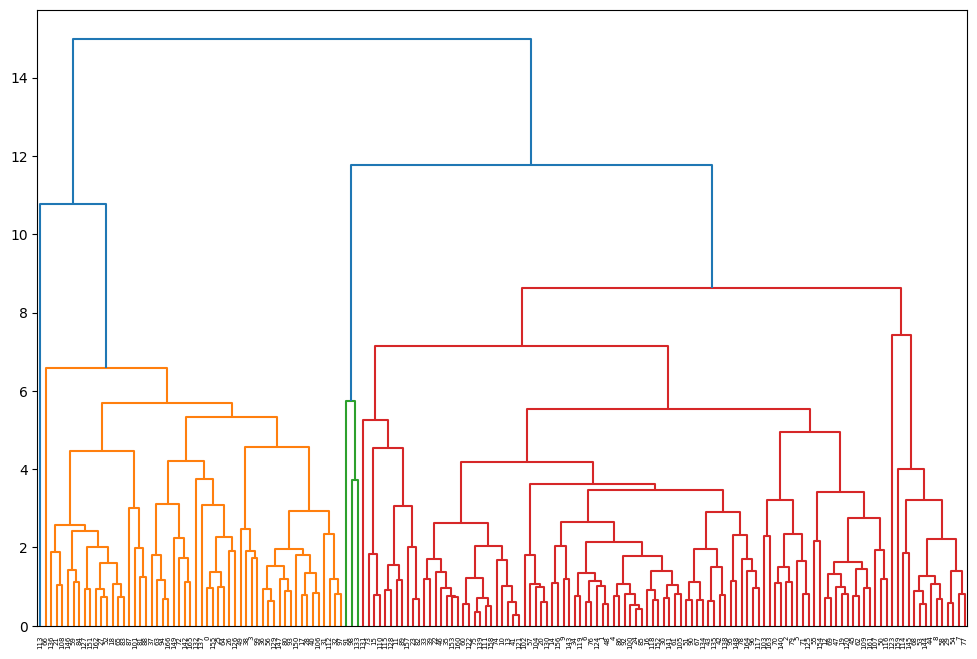

In [25]:
plt.figure(figsize=(12,8))
dendComplete = shc.dendrogram(shc.linkage(x,method='complete'))

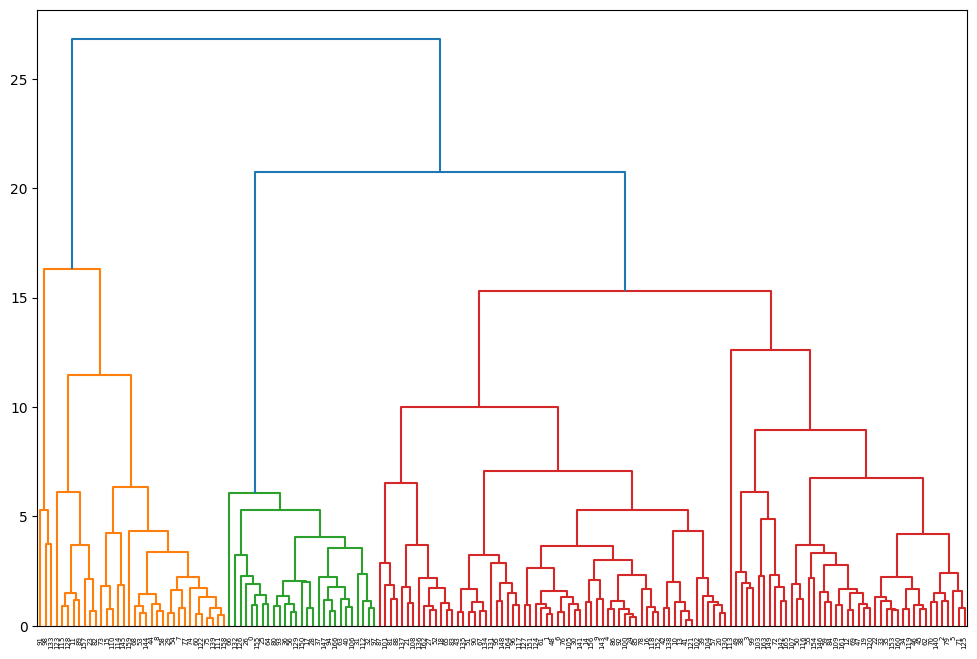

In [27]:
plt.figure(figsize=(12,8))
dendWard = shc.dendrogram(shc.linkage(x,method='ward'))

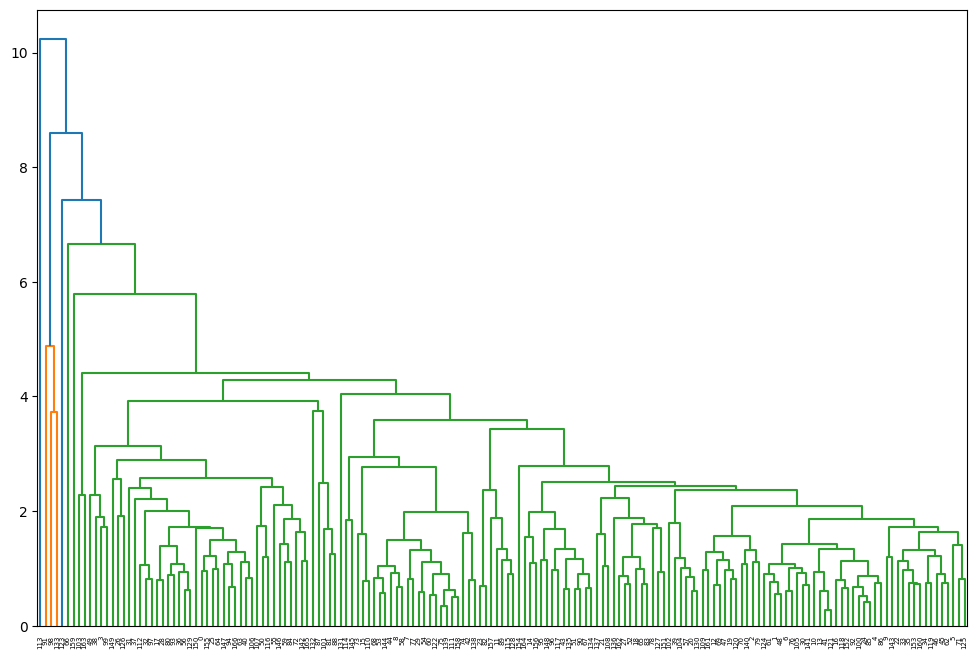

In [28]:
plt.figure(figsize=(12,8))
dendWard = shc.dendrogram(shc.linkage(x,method='average'))

In [29]:
from sklearn.cluster import AgglomerativeClustering
n = np.arange(2,8,1)
labels = []
for i in n :
    cluster = AgglomerativeClustering(n_clusters= i , linkage='ward',affinity='euclidean')
    label = cluster.fit_predict(x)
    labels.append(label)
    

C:\Users\maith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\maith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\maith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\maith\AppData\Local\Packages\PythonSoftwareFoundation.Pyth

In [30]:
for i,label in enumerate (labels):
    print('Cluster {} : {}'.format(i+1,davies_bouldin_score(x,label)))

Cluster 1 : 1.3272579599227023
Cluster 2 : 1.299788958694555
Cluster 3 : 1.0801256392082403
Cluster 4 : 1.3008007000836332
Cluster 5 : 1.1127848564262155
Cluster 6 : 1.0466161763441604


In [31]:
clusterLast = AgglomerativeClustering(n_clusters=3,linkage='ward',affinity='euclidean')
clusterLabels = clusterLast.fit_predict(x)
clusterLabels

C:\Users\maith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [33]:
dataNew = normalize(data)
dataNew = pd.DataFrame(dataNew,columns=data.columns)
dataNew.sample(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
57,0.002244,0.004760,0.001374,0.007181,0.915293,0.001163,0.009901,0.000261,0.402566
121,0.000238,0.001593,0.000296,0.001672,0.865782,0.000066,0.003030,0.000056,0.500406
34,0.001486,0.002489,0.000480,0.002139,0.902025,0.000657,0.007061,0.000150,0.431609
59,0.022429,0.008857,0.001567,0.013782,0.918772,0.004984,0.018676,0.001282,0.393330
52,0.002936,0.007043,0.000592,0.007786,0.895561,0.000515,0.007956,0.000325,0.444734


In [34]:
dataNew['labels'] = clusterLabels
dataNew.sample(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
97,0.068310,0.011368,0.002483,0.017501,0.932403,0.002179,0.029667,0.003266,0.353017,2
139,0.000085,0.000570,0.000213,0.000599,0.726950,0.000004,0.001832,0.000031,0.686688,0
18,0.006297,0.006267,0.000767,0.010426,0.946755,0.000883,0.010633,0.000351,0.321484,1
99,0.027567,0.014350,0.001248,0.017322,0.939667,0.005349,0.019303,0.001410,0.339639,1
105,0.004762,0.004577,0.000739,0.006112,0.915416,0.000139,0.010448,0.000367,0.402271,1


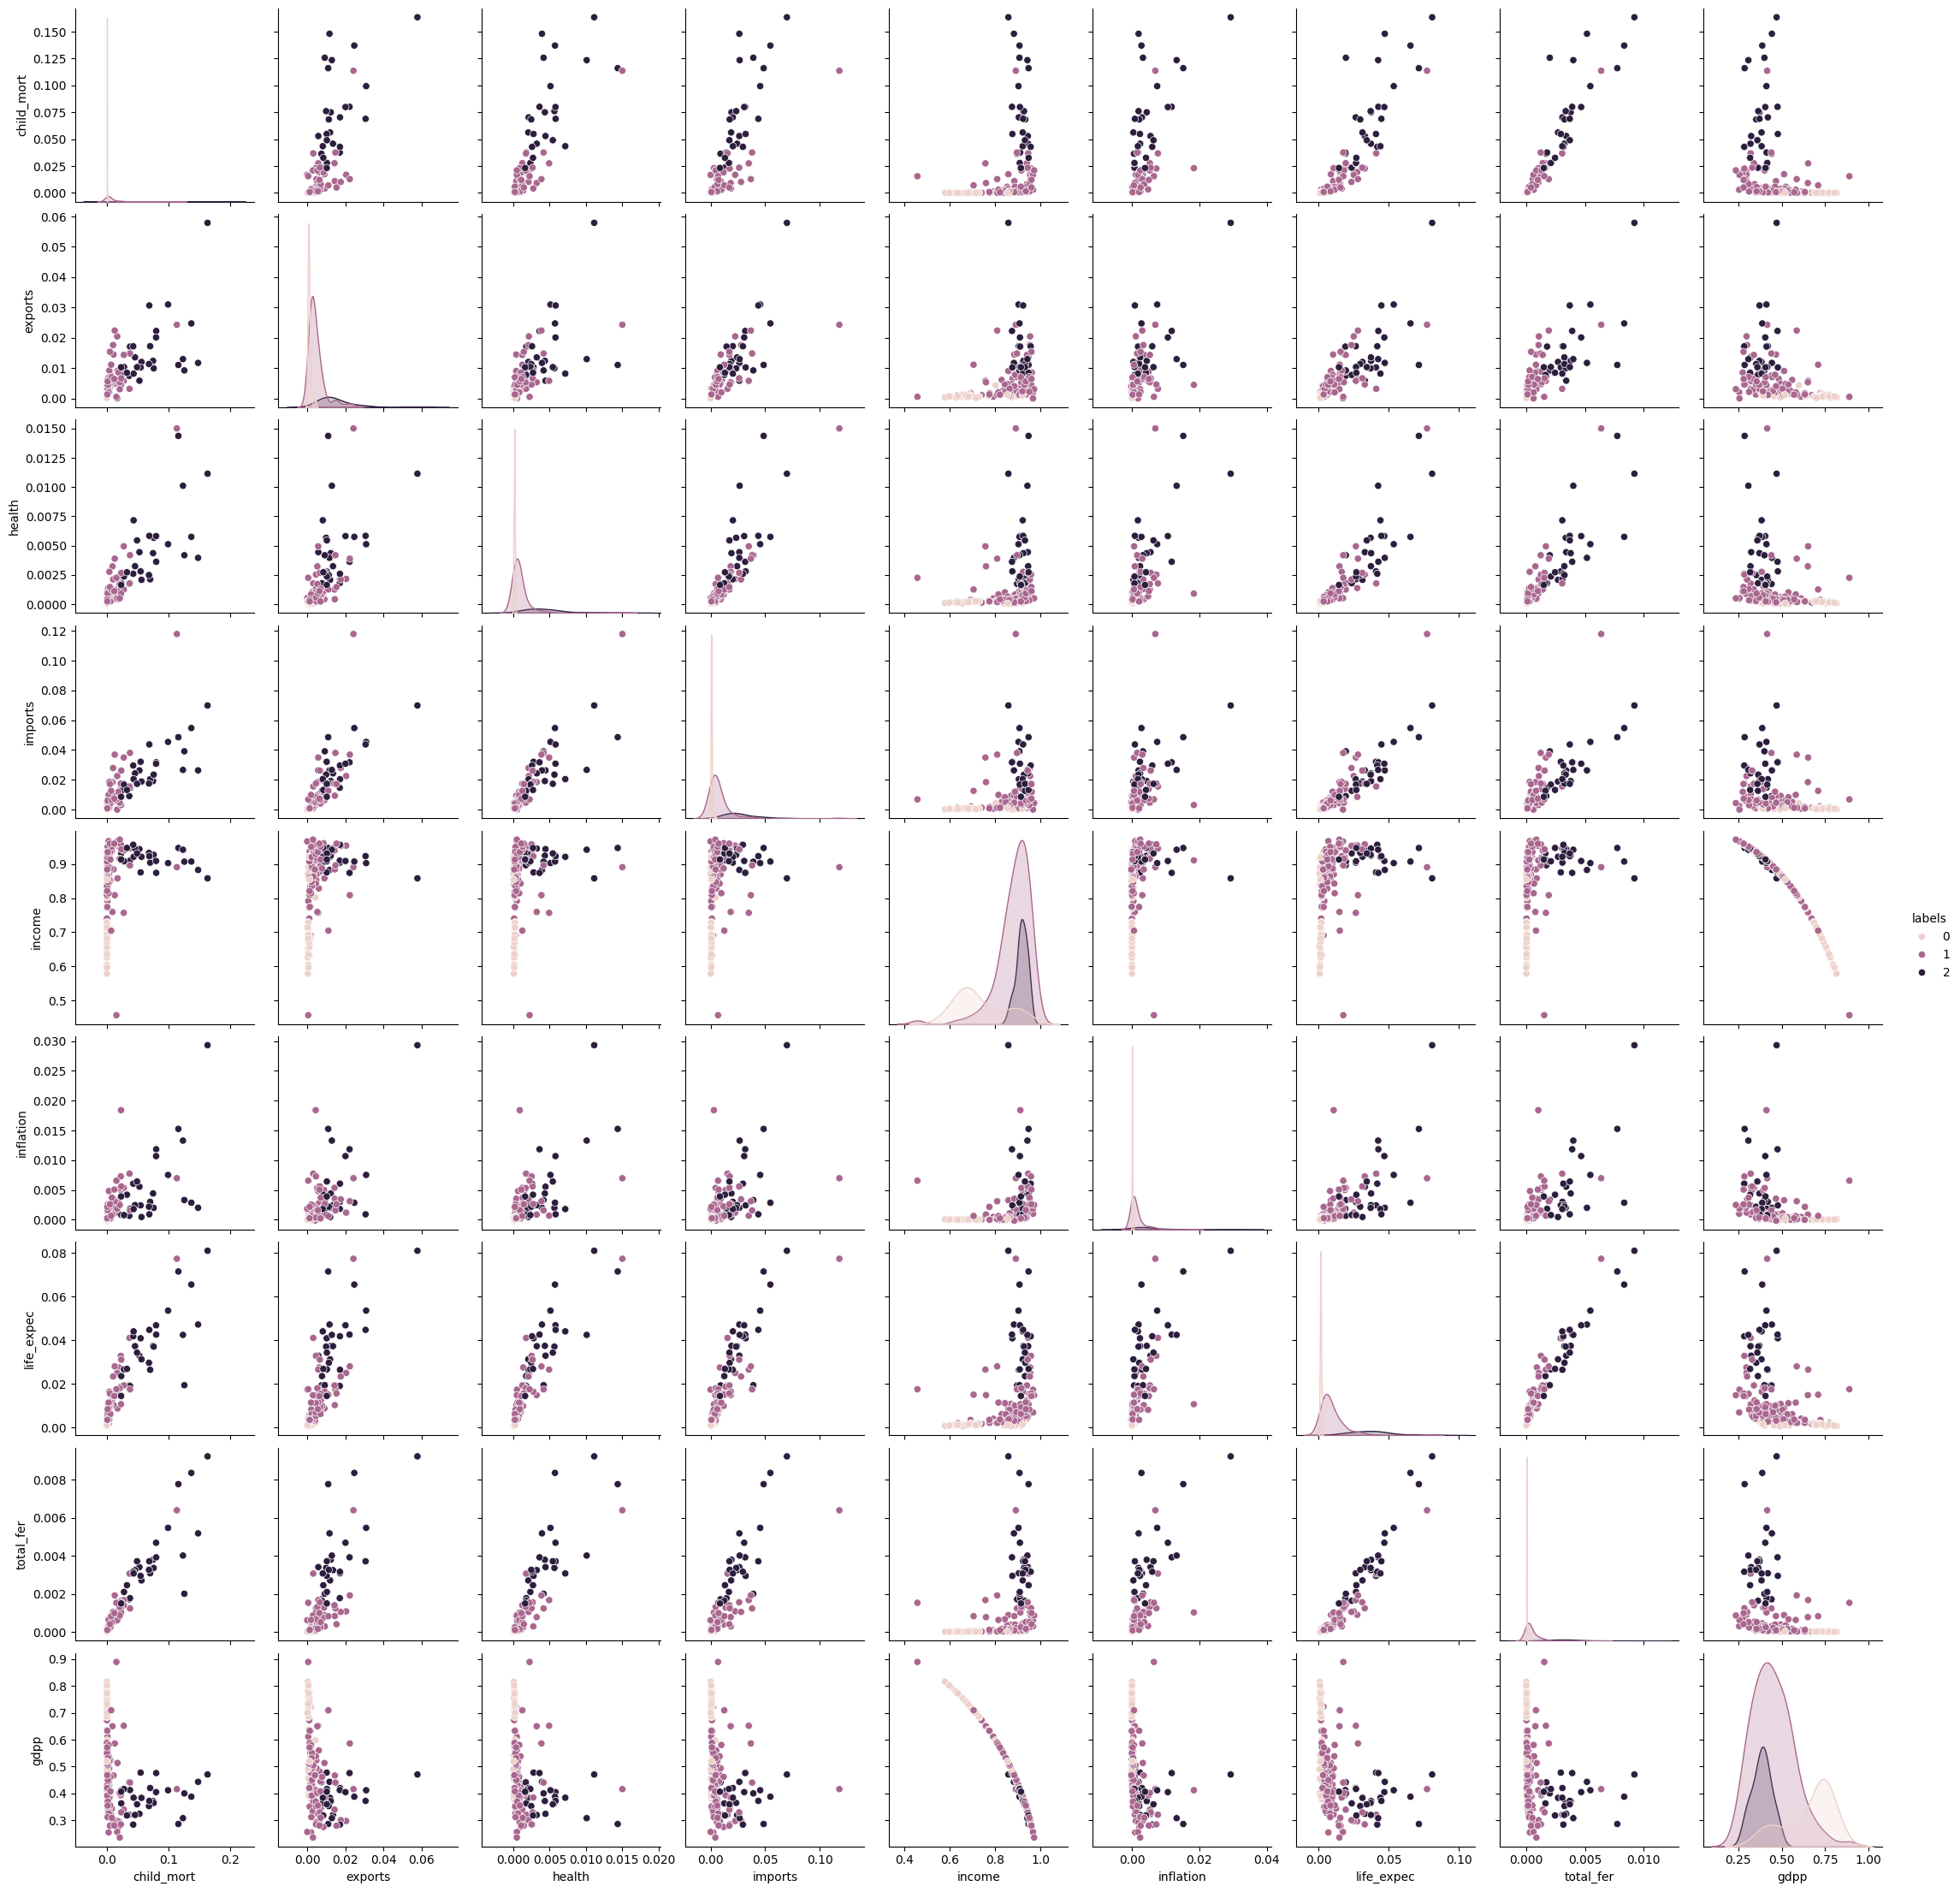

In [36]:
sns.pairplot(data=dataNew,hue = 'labels')

In [37]:
data.sample(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
18,42.7,42.5,5.20,70.7,6420,5.99,72.1,2.38,2180
54,4.2,26.8,11.90,28.1,36900,1.05,81.4,2.03,40600
74,4.6,35.0,7.63,32.9,29600,1.77,81.4,3.03,30600
89,16.6,65.6,3.88,42.1,29600,14.20,76.1,2.41,12100
45,34.4,22.7,6.22,33.3,11100,5.44,74.6,2.60,5450


In [39]:
x

array([[9.02e+01, 1.00e+01, 7.58e+00, ..., 5.62e+01, 5.82e+00, 5.53e+02],
       [1.66e+01, 2.80e+01, 6.55e+00, ..., 7.63e+01, 1.65e+00, 4.09e+03],
       [2.73e+01, 3.84e+01, 4.17e+00, ..., 7.65e+01, 2.89e+00, 4.46e+03],
       ...,
       [2.33e+01, 7.20e+01, 6.84e+00, ..., 7.31e+01, 1.95e+00, 1.31e+03],
       [5.63e+01, 3.00e+01, 5.18e+00, ..., 6.75e+01, 4.67e+00, 1.31e+03],
       [8.31e+01, 3.70e+01, 5.89e+00, ..., 5.20e+01, 5.40e+00, 1.46e+03]])

In [40]:
x = normalize(x)
x

array([[5.28625544e-02, 5.86059362e-03, 4.44232996e-03, ...,
        3.29365361e-02, 3.41086549e-03, 3.24090827e-01],
       [1.54565929e-03, 2.60713615e-03, 6.09883634e-04, ...,
        7.10444600e-03, 1.53634809e-04, 3.80828101e-01],
       [2.00006203e-03, 2.81327406e-03, 3.05503980e-04, ...,
        5.60456942e-03, 2.11728178e-04, 3.26750061e-01],
       ...,
       [4.97959888e-03, 1.53876017e-02, 1.46182216e-03, ...,
        1.56226900e-02, 4.16747546e-04, 2.79968864e-01],
       [1.20589885e-02, 6.42574875e-03, 1.10951262e-03, ...,
        1.44579347e-02, 1.00027489e-03, 2.80591029e-01],
       [2.31349866e-02, 1.03007762e-02, 1.63977221e-03, ...,
        1.44767666e-02, 1.50335653e-03, 4.06463062e-01]])

In [41]:
inertia = []
for n in range(1,11):
    algorithm = KMeans(n_clusters= n ,random_state=111)
    algorithm.fit(x)
    inertia.append(algorithm.inertia_)
    

C:\Users\maith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\maith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\maith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

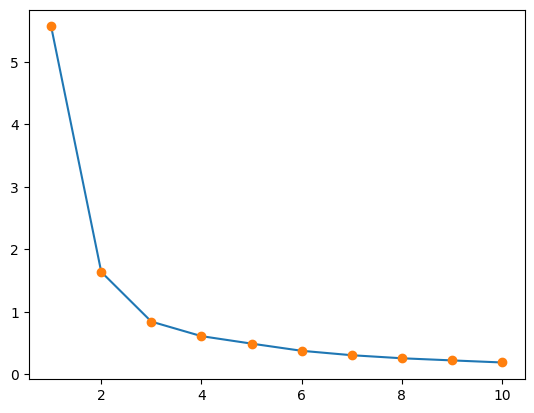

In [42]:
plt.plot(np.arange(1,11),inertia)
plt.plot(np.arange(1,11),inertia,'o')

In [43]:
algorithm = KMeans(n_clusters=3,random_state=111)
algorithm.fit(x)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

C:\Users\maith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [44]:
centroids1

array([[1.89973424e-03, 1.41159823e-03, 5.18643396e-04, 2.90914866e-03,
        6.78742436e-01, 3.45565877e-04, 3.63893463e-03, 1.78818699e-04,
        7.29344202e-01],
       [2.65698003e-02, 7.83591318e-03, 2.09647839e-03, 1.38388435e-02,
        9.28546308e-01, 2.75256412e-03, 1.91114548e-02, 1.44277188e-03,
        3.62757939e-01],
       [8.42918330e-03, 5.13419276e-03, 8.04677579e-04, 6.63167707e-03,
        8.58474169e-01, 1.28772230e-03, 8.40689071e-03, 5.51309664e-04,
        5.08823371e-01]])

In [47]:
dataNew = data
dataNew = normalize(dataNew)
dataNew2 = pd.DataFrame(dataNew,columns=data.columns)
dataNew2.sample(5)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
160,0.000509,0.001262,0.000401,0.001219,0.820800,0.000236,0.003667,0.000100,0.571200
6,0.002435,0.002798,0.000592,0.006093,0.901246,0.001045,0.009860,0.000227,0.433136
150,0.068877,0.030663,0.005835,0.043706,0.922931,0.000900,0.044774,0.003715,0.372223
10,0.000382,0.000968,0.000218,0.001208,0.633085,-0.000011,0.002040,0.000051,0.774078
146,0.023415,0.006658,0.002672,0.026185,0.942848,0.005586,0.031101,0.001568,0.329774


In [48]:
dataNew2['labels'] = labels1
dataNew2.sample(3)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,labels
124,0.000586,0.001662,0.000285,0.001979,0.907666,0.000180,0.003758,0.000081,0.419668,1
161,0.008139,0.007108,0.001303,0.006390,0.950707,0.003700,0.015427,0.000525,0.309428,1
33,0.000373,0.001618,0.000342,0.001343,0.832703,0.000385,0.003395,0.000081,0.553705,2


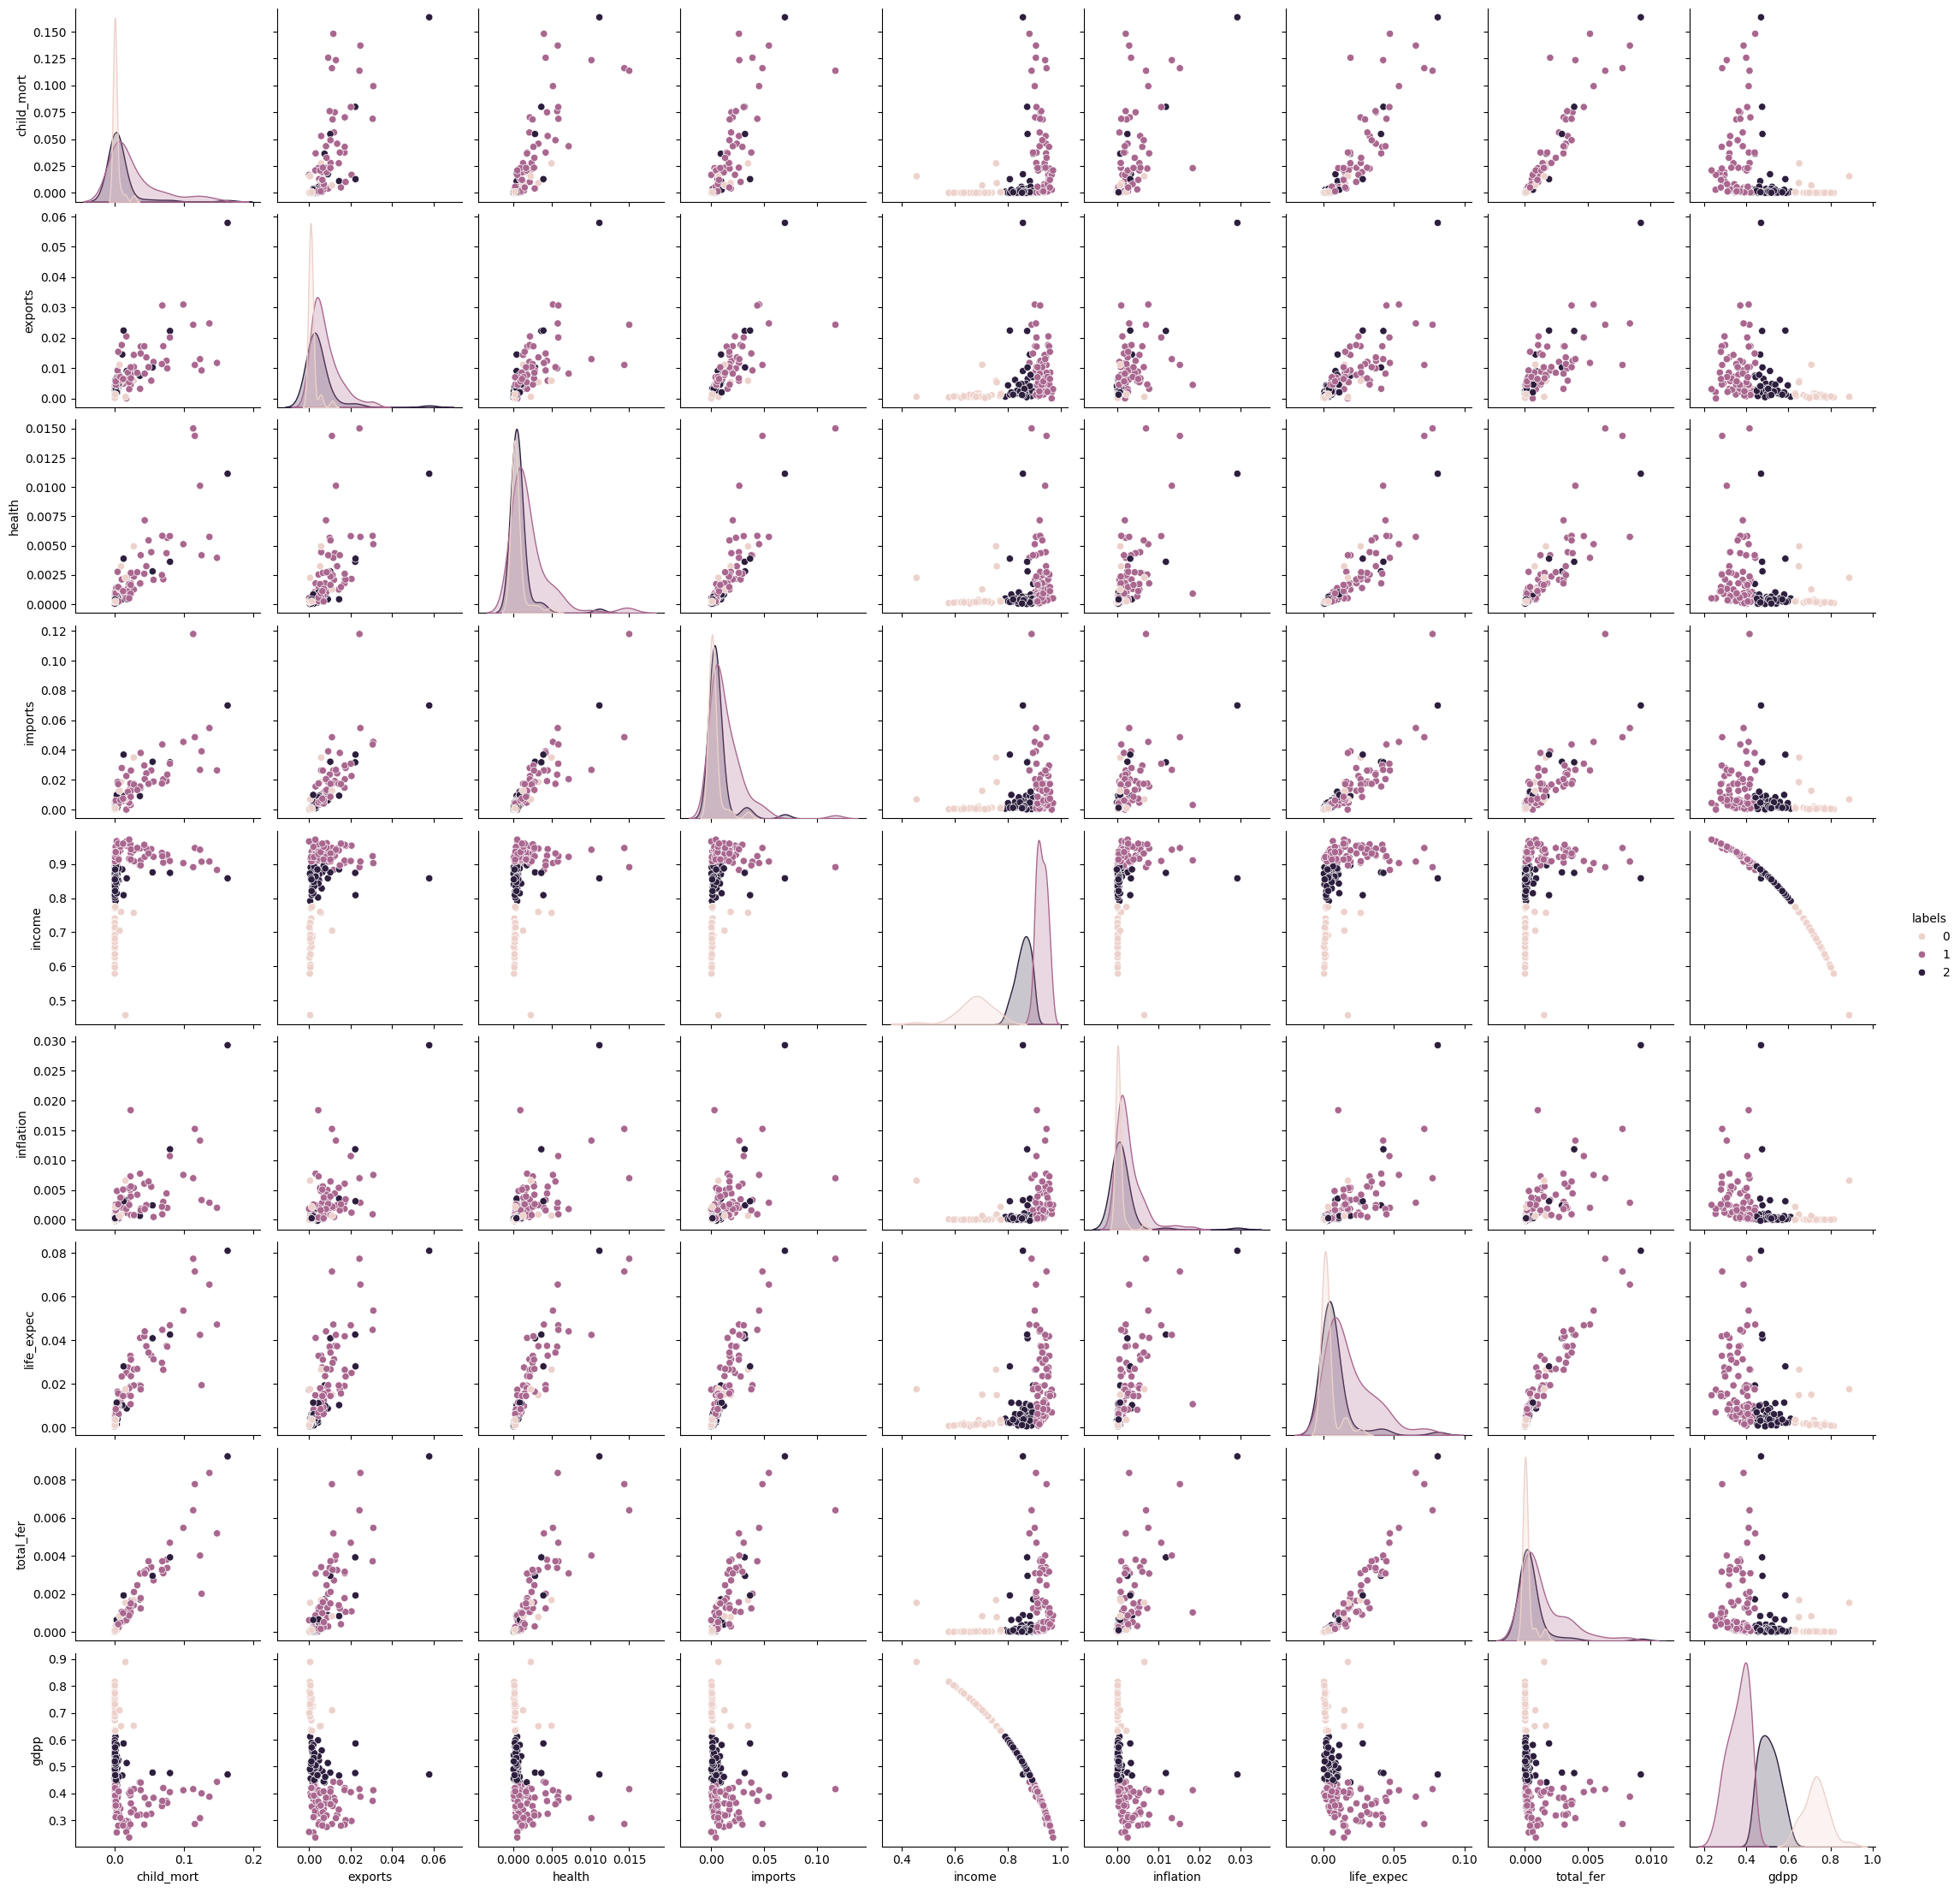

In [49]:
sns.pairplot(data = dataNew2,hue = 'labels')